# Building a Spam Filter with Naive Bayes

## Introduction

In this project We are going to build a spam filter specifically directed at mobile phone(SMS)spam.The filter will able to anlyze the new message and tell wheteher it is spam or not.
The dataset was put together by Tiago A. Almeida and José María Gómez Hidalgo, and it can be downloaded from
__[The UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection)__.The data collection process is described in details on __[this page](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/#composition)__.
  
   So, our goal in this project is to write a program that classifies new message as spam or ham.

## Exploring The dataset

In [1]:
# Lets read the data file
import pandas as pd
sms_file = pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=['Label', 'SMS'])


In [2]:
print(sms_file.shape)
print(sms_file.head())

(5572, 2)
  Label                                                SMS
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


Below we can see that 87% messages are ham(means no spam) and 13% messages are spam.

In [3]:
sms_file['Label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

## Training set and Test set

Now we are going to split the data set into training set and test set, where about 80% of data accounts for training set and remaining 20% accounts fot test set.

In [4]:
# Randomize the dat set
randomized_data = sms_file.sample(frac = 1 , random_state = 1)

# Calculating indx
index = round(len(sms_file)*.8)

# Splitting data set 
training_set = randomized_data.iloc[:index].reset_index(drop=True)
test_set = randomized_data.iloc[index:].reset_index(drop=True)


print(training_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


We will now analyze percentage of ham and spam messages for training set and test set, as per earlier calculation we can expect 87% messages are ham and 13% messages are spam.

In [5]:
training_set['Label'].value_counts(normalize=True)

ham     0.86541
spam    0.13459
Name: Label, dtype: float64

In [6]:
test_set['Label'].value_counts(normalize=True)

ham     0.868043
spam    0.131957
Name: Label, dtype: float64

This looks good.Now we can proceed for data cleaning.

## Data Cleaning

Our goal in the data cleaning process is to bring the data in the following format,

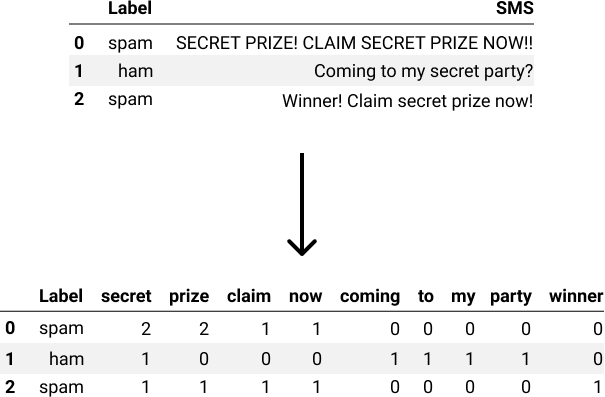





      

In [7]:
# Before cleaning
print(training_set.head())

  Label                                                SMS
0   ham                       Yep, by the pretty sculpture
1   ham      Yes, princess. Are you going to make me moan?
2   ham                         Welp apparently he retired
3   ham                                            Havent.
4   ham  I forgot 2 ask ü all smth.. There's a card on ...


In [8]:
# After Cleaning
training_set['SMS'] = training_set['SMS'].str.replace('\W', ' ')
training_set['SMS'] = training_set['SMS'].str.lower()

print(training_set.head())

  Label                                                SMS
0   ham                       yep  by the pretty sculpture
1   ham      yes  princess  are you going to make me moan 
2   ham                         welp apparently he retired
3   ham                                            havent 
4   ham  i forgot 2 ask ü all smth   there s a card on ...


C:\Users\Alok\AppData\Local\Temp/ipykernel_14764/4068666307.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  training_set['SMS'] = training_set['SMS'].str.replace('\W', ' ')


## Creating Vocabulory 

Lets create vocabulary, which contains a list of unique words appearing in messages.

In [9]:
training_set['SMS'] = training_set['SMS'].str.split()
vocabulary = []

for message in training_set['SMS']:
    for word in message:
        vocabulary.append(word)
        
vocabulary = list(set(vocabulary))


In [10]:
len(vocabulary)

7783

So, ther are 7783 unique words in our messages of training set.

In [11]:
word_counts_per_sms = {unique_word : [0]*(len(training_set['SMS']))
                      for unique_word in vocabulary}
for index, sms in enumerate(training_set['SMS']):
    for word in sms:
        word_counts_per_sms[word][index] += 1 
        
        
        
        

In [12]:
word_count = pd.DataFrame(word_counts_per_sms)

word_count.head()

,sentence,ignoring,forgiven,tiring,acnt,po,blacko,get,decorating,quick,...,cook,week,nights,possessive,ouch,machines,holding,favour,billy,ola
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
training_set_clean = pd.concat([training_set,word_count], axis=1)

training_set_clean.head()
    

,Label,SMS,sentence,ignoring,forgiven,tiring,acnt,po,blacko,get,...,cook,week,nights,possessive,ouch,machines,holding,favour,billy,ola
0,ham,"[yep, by, the, pretty, sculpture]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[yes, princess, are, you, going, to, make, me,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[welp, apparently, he, retired]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,[havent],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[i, forgot, 2, ask, ü, all, smth, there, s, a,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Calculating Constants

We are now done with the data cleaning , Naive Bayes Algorithm will need to know the following probabilities values to classify the message.
                 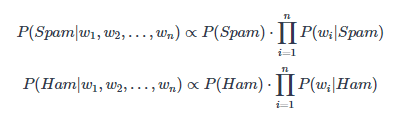
                 
     
   
   
   







  
     
    
         
         
        

Also wewill need to use the following equations

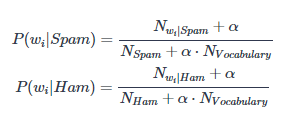

Some of the terms in above equations have same value for every new message. Let's calculate them first.

* P(SPam) , P(Ham)
* NSpam, NHam, NVocabulary


We will use Laplace smoothening and set α = 1

In [14]:
spam_messages = training_set_clean[training_set_clean['Label']=='spam']
ham_messages = training_set_clean[training_set_clean['Label']=='ham']

p_spam =len(spam_messages)/len(training_set_clean)
p_ham = len(ham_messages)/len(training_set_clean)


n_words_per_spam_message = spam_messages['SMS'].apply(len)
n_spam = n_words_per_spam_message.sum()

n_words_per_ham_message = ham_messages['SMS'].apply(len)
n_ham = n_words_per_ham_message.sum()

n_vocabulary = len(vocabulary)


alpha = 1

## Calculating Parameters
In the previous cell we have calculated constant values P(Spam), P(Ham),NSpam, NHam, Nvocabulary.Now we will proceed further to calculate P(wi|Spam) and P(wi|Ham),which are also called as parameters.Parameters can be calculated using the equations:

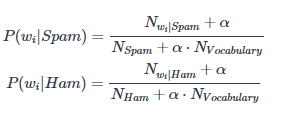

In [15]:
spam_messages.head()

,Label,SMS,sentence,ignoring,forgiven,tiring,acnt,po,blacko,get,...,cook,week,nights,possessive,ouch,machines,holding,favour,billy,ola
16,spam,"[freemsg, why, haven, t, you, replied, to, my,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,spam,"[congrats, 2, mobile, 3g, videophones, r, your...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,spam,"[free, message, activate, your, 500, free, tex...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,spam,"[call, from, 08702490080, tells, u, 2, call, 0...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,spam,"[someone, has, conacted, our, dating, service,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Initiate parameters
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word : 0 for unique_word in vocabulary}

# Calculate parameters 
for word in vocabulary:
    n_word_given_spam = spam_messages[word].sum()
    p_word_given_spam = (n_word_given_spam + alpha)/(n_spam+(alpha*n_vocabulary))
    parameters_spam[word] = p_word_given_spam
    
    n_word_given_ham = ham_messages[word].sum()
    p_word_given_ham = (n_word_given_ham + alpha)/(n_ham + (alpha*n_vocabulary))
    parameters_ham[word] = p_word_given_ham
    
    

## Classifying a new message
We have calculated all the constants and parameters we need, we can start creating the spam filter.The spam filter can be understood as function that:
* Takes in as input a new message (w1, w2, ..., wn)
* Calculates P(Spam|w1, w2, ..., wn) and P(Ham|w1, w2, ..., wn)
* Compares the values of P(Spam|w1, w2, ..., wn) and P(Ham|w1, w2, ..., wn), and:
  * If P(Ham|w1, w2, ..., wn) > P(Spam|w1, w2, ..., wn), then the message is classified as ham.
  * If P(Ham|w1, w2, ..., wn) < P(Spam|w1, w2, ..., wn), then the message is classified as spam.
  * If P(Ham|w1, w2, ..., wn) = P(Spam|w1, w2, ..., wn), then the algorithm may request human help.

In [17]:
import re
def classify(message):
    ''' 
    message: a string
    
    '''
    message = re.sub('\W',' ',message)
    message = message.lower()
    message = message.split()
    
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    
    for word in message :
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]
            
        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]
            
    print('P(SPAM|message):', p_spam_given_message)
    print('P(HAM|message):', p_ham_given_message)
    
    if p_ham_given_message > p_spam_given_message:
        print('Label : Ham')
    elif p_ham_given_message < p_spam_given_message :
        print('Label : Spam')
    else :
        print("Equal Probabilities, have human classify this!")
        

In [18]:
classify("WINNER! This is the secret code to unlock the money: C3421")

P(SPAM|message): 1.3481290211300841e-25
P(HAM|message): 1.9368049028589875e-27
Label : Spam


In [19]:
classify("Sounds good, Tom, then see u there")

P(SPAM|message): 2.4372375665888117e-25
P(HAM|message): 3.687530435009238e-21
Label : Ham


## Measuring The Spam Filter's Accuracy

We will now determine how well the spam filter does with est set of 1,114 messages.

We will change the classify() function that we wrote previously, to return the labels instead of printing them.

In [20]:
def classify_test_set(message):
    message = re.sub("\W",' ', message)
    message = message.lower()
    message = message.split()
    
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    
    for word in message :
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]
            
        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]
    if p_ham_given_message > p_spam_given_message:
        return('ham')
    elif p_ham_given_message < p_spam_given_message:
        return('spam')
    else :
        return('needs human classification')
    
    
    

Now we have a function that returns label , we can use it to create new column in our dataset.

In [21]:
test_set['predicted'] = test_set['SMS'].apply(classify_test_set)
test_set.head()

,Label,SMS,predicted
0,ham,Later i guess. I needa do mcat study too.,ham
1,ham,But i haf enuff space got like 4 mb...,ham
2,spam,Had your mobile 10 mths? Update to latest Oran...,spam
3,ham,All sounds good. Fingers . Makes it difficult ...,ham
4,ham,"All done, all handed in. Don't know if mega sh...",ham


In [22]:
total = test_set.shape[0]
correct = 0

for row in test_set.iterrows():
    row = row[1]
    if row['Label'] == row['predicted']:
        correct += 1
accuracy = correct/total

print("Correct:", correct)
print("Incorrect", total-correct)
print("Accuracy", accuracy)

Correct: 1100
Incorrect 14
Accuracy 0.9874326750448833


So, the spam filter has an accuracy of about 98.74% , which is an excellent result.